In [ ]:
# Load Data
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import torch
import re
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BartTokenizer, BartForConditionalGeneration

## 1. Load and Visualize Text Data

9937


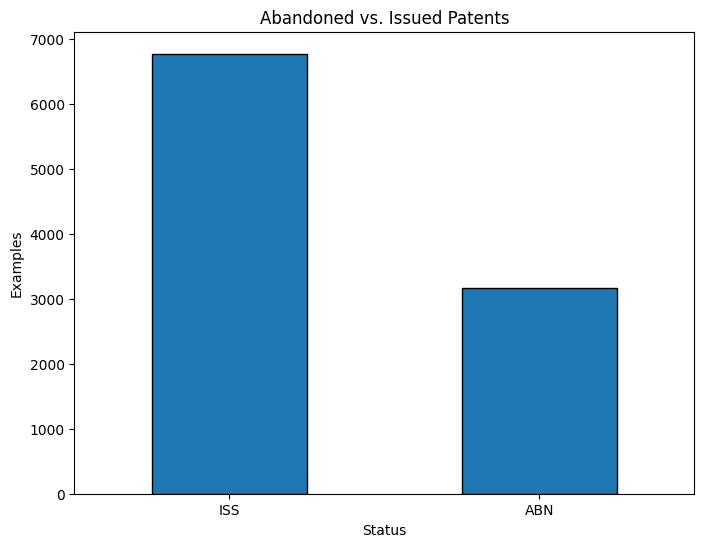

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame
df = pd.read_csv('/content/drive/MyDrive/CSCI567/project/data/text_patentability_data.csv')
df = df[df['status'] != 'PEND']
print(len(df))
# Count the occurrences of each status
status_counts = df['status'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar',edgecolor='black')
plt.title('Abandoned vs. Issued Patents')
plt.xlabel('Status')
plt.ylabel('Examples')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally
plt.show()

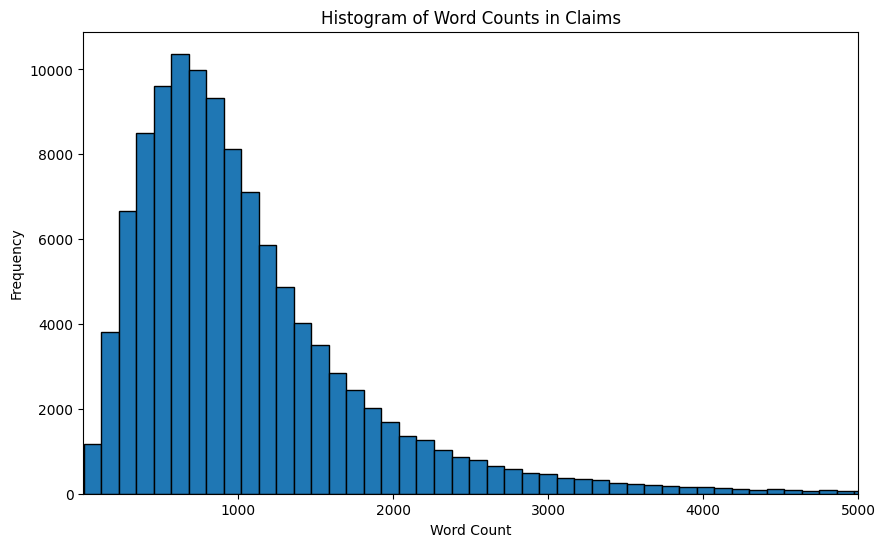

In [ ]:
# count number of words in the claims text
def count_words(text):
    # Split the text into words based on spaces
    words = text.split()

    # Count the number of words
    number_of_words = len(words)

    return number_of_words

# Assuming df is your DataFrame and 'claims' is the column
all_word_counts = []

for text in df['claims']:
    all_word_counts.append(count_words(str(text)))  # Convert to string to handle non-text entries

plt.figure(figsize=(10, 6))
plt.hist(all_word_counts, bins=500,rwidth=1,edgecolor='black')
plt.xlim(1, 5000)
plt.title('Histogram of Word Counts in Claims')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

## 2. Run BART, BART tokenizer on each row of DF

In [ ]:
# Check if GPU is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and tokenizer
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn').to(device)
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

# Function to summarize text
def summarize(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True).to(device)
    summary_ids = model.generate(inputs['input_ids'], max_length=512, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Function to remove (cancelled) token in claims
def preprocess(text):
  text = re.sub(r"\(canceled\s*\)", " ", text, flags=re.IGNORECASE)
  text = re.sub(r"\(cancelled\s*\)", " ", text, flags=re.IGNORECASE)
  return text

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# pre-processing" remove (Cancelled or Canceled) from dataset, indicative of examiner review and not present at patent filing
df['claims'] = df['claims'].apply(lambda x: preprocess(x))
print(df['claims'].head())

#summarizing step
df['abstracts'] = df['claims'].apply(lambda x: summarize(x))

#save it for viewing and debugging purposes
df.to_csv('/content/drive/MyDrive/CSCI567/project/data/text_df_summaries.csv', index=False)

0    1-19.   20. The mutant endotoxin made accordin...
1    1-41.   42. An isolated peptide having an anti...
2    1-23.   24. An image processing device compris...
3    1-36.   37. The method of managing documents a...
4    1. A terminal comprising: a period reader read...
Name: claims, dtype: object
